In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('miuz.csv')
df.head()
df = df.drop('Unnamed: 0',axis = 1)
df

,Группа,title,Старая цена,Новая цена,Скидка,Металл,Вес,Ссылка,Брэнд
0,rings,Кольцо,60753,42526,30,Золото 585,3.17 г.,https://miuz.ru/catalog/rings/R01-W-60374-Z/,miuz
1,rings,Кольцо,56360,36633,35,Золото 585,3.83 г.,https://miuz.ru/catalog/rings/R01-WED-00056/,miuz
2,rings,Кольцо с бриллиантом,79900,39950,50,Золото 585,2.77 г.,https://miuz.ru/catalog/rings/R01-WED-00078/,miuz
3,rings,Кольцо с бриллиантами,74900,37450,50,Золото 585,1.6 г.,https://miuz.ru/catalog/rings/R01-35482/,miuz
4,rings,Кольцо,32800,21320,35,Золото 585,1.96 г.,https://miuz.ru/catalog/rings/R01-WED-00171-3/,miuz
...,...,...,...,...,...,...,...,...,...
14139,chain,Цепь,20129,14090,30,Золото 585,1.1 г.,https://miuz.ru/catalog/chain/C4204-C-78/,miuz
14140,chain,Цепь,19459,13621,30,Золото 585,1.39 г.,https://miuz.ru/catalog/chain/C37-CYAK10310030/,miuz
14141,chain,Цепь,45748,32023,30,Золото 585,2.5 г.,https://miuz.ru/catalog/chain/C4209-CH50/,miuz
14142,chain,Цепь,26534,18574,30,Золото 585,1.45 г.,https://miuz.ru/catalog/chain/C4204-C-74/,miuz


Проверим на дубликаты

In [3]:
df.duplicated().sum()

1160

Удалим дубликаты

In [4]:
df = df.drop_duplicates().assign()
df

,Группа,title,Старая цена,Новая цена,Скидка,Металл,Вес,Ссылка,Брэнд
0,rings,Кольцо,60753,42526,30,Золото 585,3.17 г.,https://miuz.ru/catalog/rings/R01-W-60374-Z/,miuz
1,rings,Кольцо,56360,36633,35,Золото 585,3.83 г.,https://miuz.ru/catalog/rings/R01-WED-00056/,miuz
2,rings,Кольцо с бриллиантом,79900,39950,50,Золото 585,2.77 г.,https://miuz.ru/catalog/rings/R01-WED-00078/,miuz
3,rings,Кольцо с бриллиантами,74900,37450,50,Золото 585,1.6 г.,https://miuz.ru/catalog/rings/R01-35482/,miuz
4,rings,Кольцо,32800,21320,35,Золото 585,1.96 г.,https://miuz.ru/catalog/rings/R01-WED-00171-3/,miuz
...,...,...,...,...,...,...,...,...,...
14139,chain,Цепь,20129,14090,30,Золото 585,1.1 г.,https://miuz.ru/catalog/chain/C4204-C-78/,miuz
14140,chain,Цепь,19459,13621,30,Золото 585,1.39 г.,https://miuz.ru/catalog/chain/C37-CYAK10310030/,miuz
14141,chain,Цепь,45748,32023,30,Золото 585,2.5 г.,https://miuz.ru/catalog/chain/C4209-CH50/,miuz
14142,chain,Цепь,26534,18574,30,Золото 585,1.45 г.,https://miuz.ru/catalog/chain/C4204-C-74/,miuz


Проверим на пропущенные значения

In [5]:
df.isna().sum()

Группа         0
title          0
Старая цена    0
Новая цена     0
Скидка         0
Металл         0
Вес            0
Ссылка         0
Брэнд          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12984 entries, 0 to 14143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Группа       12984 non-null  object
 1   title        12984 non-null  object
 2   Старая цена  12984 non-null  int64 
 3   Новая цена   12984 non-null  int64 
 4   Скидка       12984 non-null  int64 
 5   Металл       12984 non-null  object
 6   Вес          12984 non-null  object
 7   Ссылка       12984 non-null  object
 8   Брэнд        12984 non-null  object
dtypes: int64(3), object(6)
memory usage: 1014.4+ KB


Приведем столбец "Вес" к числовому типа

In [7]:
df['Вес'] = df['Вес'].map(lambda x: x.replace('г.','')).astype('float64')

In [8]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12984 entries, 0 to 14143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Группа       12984 non-null  object 
 1   title        12984 non-null  object 
 2   Старая цена  12984 non-null  int64  
 3   Новая цена   12984 non-null  int64  
 4   Скидка       12984 non-null  int64  
 5   Металл       12984 non-null  object 
 6   Вес          12984 non-null  float64
 7   Ссылка       12984 non-null  object 
 8   Брэнд        12984 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1014.4+ KB


In [9]:
df.describe()

,Старая цена,Новая цена,Скидка,Вес
count,1.298400e+04,1.298400e+04,12984.000000,12984.000000
mean,1.641576e+05,8.812651e+04,41.373383,3.224893
std,2.645488e+05,1.426833e+05,13.937134,3.138691
min,0.000000e+00,4.470000e+02,0.000000,0.230000
25%,3.304600e+04,2.106800e+04,30.000000,1.730000
50%,7.052800e+04,3.594000e+04,40.000000,2.500000
75%,1.499000e+05,7.660000e+04,60.000000,3.660000
max,2.649000e+06,1.059600e+06,65.000000,81.170000


Проверим выбросы. Для этого возмем только числовые данные и стандартизуем их

In [10]:
df_num = df.select_dtypes(['float','int'])[['Новая цена','Вес']]
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df[col]- m)/s
df_std.head()

,Новая цена_n,Вес_n
0,-0.319592,-0.017489
1,-0.360894,0.192790
2,-0.337646,-0.144931
3,-0.355168,-0.517698
4,-0.468215,-0.403000


нарисуем график boxplot

<ipython-input-11-0d468aa8d553>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_std.columns)


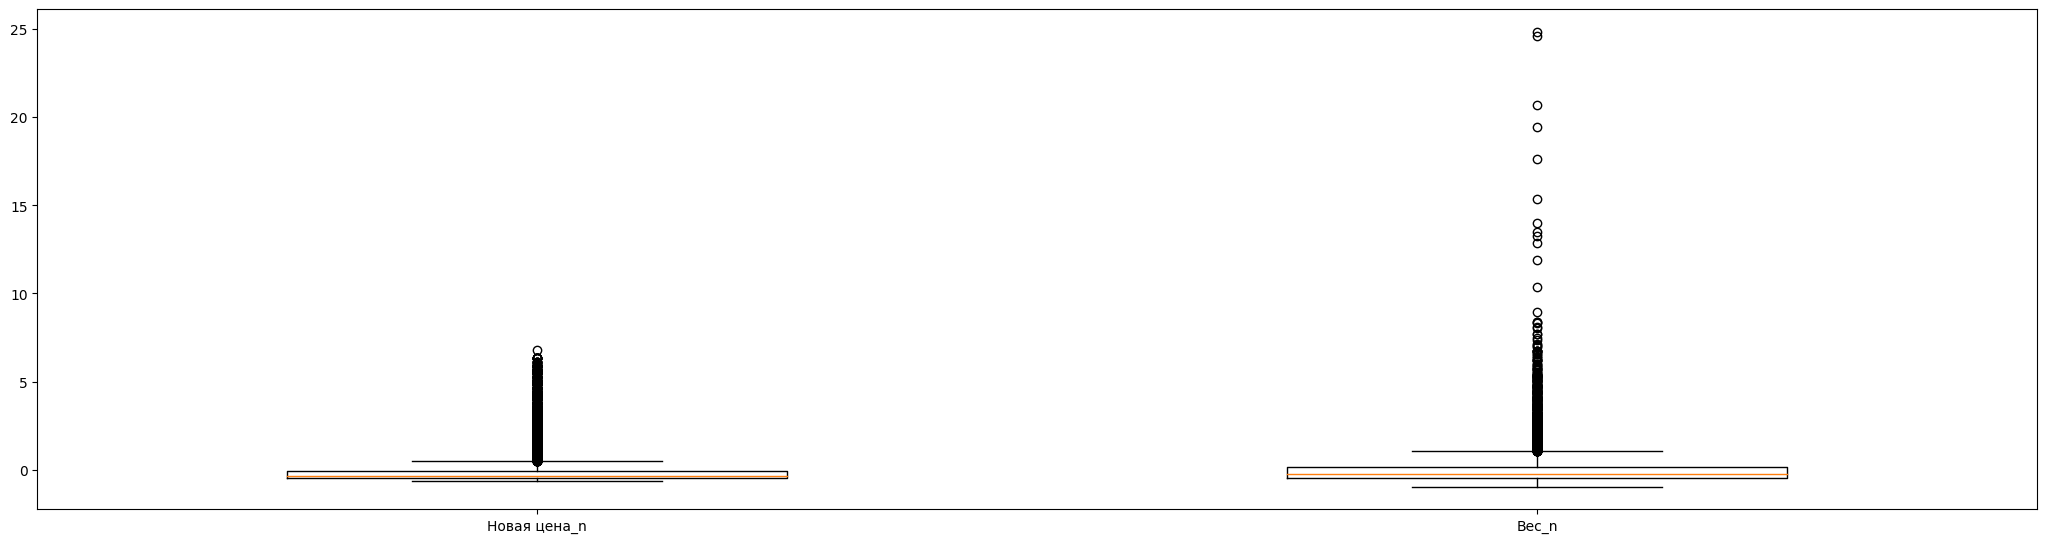

In [11]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(df_std.columns)
data = []
for col in df_std.columns:
  data.append(df_std[col])
bp= ax.boxplot(data,widths=0.5)
plt.show()

In [12]:
df.loc[(df['Новая цена'] == df['Новая цена'].max())]

,Группа,title,Старая цена,Новая цена,Скидка,Металл,Вес,Ссылка,Брэнд
12909,necklace,Колье с выращенным бриллиантом,2649000,1059600,60,Золото 585,21.15,https://miuz.ru/catalog/necklace/N157-MLN-TTTN...,miuz


In [13]:
df.loc[(df['Вес'] == df['Вес'].max())]

,Группа,title,Старая цена,Новая цена,Скидка,Металл,Вес,Ссылка,Брэнд
13667,necklace,Колье с бриллиантами и жемчугом,2249000,787150,65,Золото 585,81.17,https://miuz.ru/catalog/necklace/N2018-NL02000...,miuz


# Данные параметры не считаются выбросами, т.к имеет место быть сверхъдорогие увелирные украшения

Проверим распеределение по группам

In [14]:
fig = plt.figure(figsize = (8,8))
df_group_category = df.groupby('Группа',as_index = False).agg('count')
df_group_category

,Группа,title,Старая цена,Новая цена,Скидка,Металл,Вес,Ссылка,Брэнд
0,bracelets,783,783,783,783,783,783,783,783
1,chain,347,347,347,347,347,347,347,347
2,earrings,4852,4852,4852,4852,4852,4852,4852,4852
3,necklace,950,950,950,950,950,950,950,950
4,pendants,1082,1082,1082,1082,1082,1082,1082,1082
5,rings,4970,4970,4970,4970,4970,4970,4970,4970


<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f7a96637460>,
 [Text(1.080317984363102, 0.2071546587978286, 'bracelets'),
  Text(0.9842535533432567, 0.49116691941861573, 'chain'),
  Text(-0.16439765449559418, 1.0876458114645353, 'earrings'),
  Text(-1.0998422275375392, 0.018629936265691236, 'necklace'),
  Text(-0.9783612530818463, -0.5028014105669552, 'pendants'),
  Text(0.39599315389537115, -1.0262501751853674, 'rings')],
 [Text(0.5892643551071465, 0.11299345025336104, '6.0%'),
  Text(0.5368655745508673, 0.26790922877379036, '2.7%'),
  Text(-0.08967144790668773, 0.5932613517079283, '37.4%'),
  Text(-0.5999139422932032, 0.010161783417649764, '7.3%'),
  Text(-0.5336515925900979, -0.2742553148547028, '8.3%'),
  Text(0.2159962657611115, -0.5597728228283821, '38.3%')])

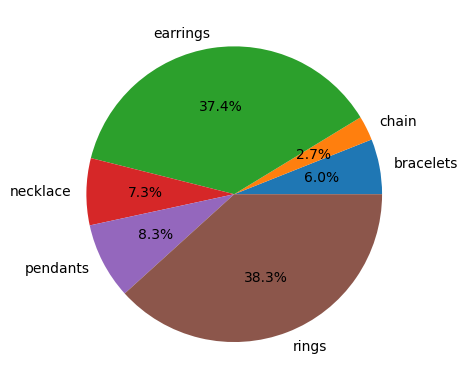

In [15]:
plt.pie(df_group_category['title'], labels = df_group_category['Группа'],autopct='%.01f%%')

Как мы видим, большую часть товаров занимают Серьги и Кольца, следовательно данные товары пользуются наибольшей популярностью

Построим график средней ценны по категориям

In [16]:
df_group_avg = df.groupby('Группа',as_index = False).agg({'Новая цена':'mean'}).rename(columns={'Новая цена': 'Средняя цена'})
df_group_avg

,Группа,Средняя цена
0,bracelets,114080.844189
1,chain,55854.582133
2,earrings,86255.008038
3,necklace,149827.398947
4,pendants,42623.225508
5,rings,86230.211670


<Axes: xlabel='Группа', ylabel='Средняя цена'>

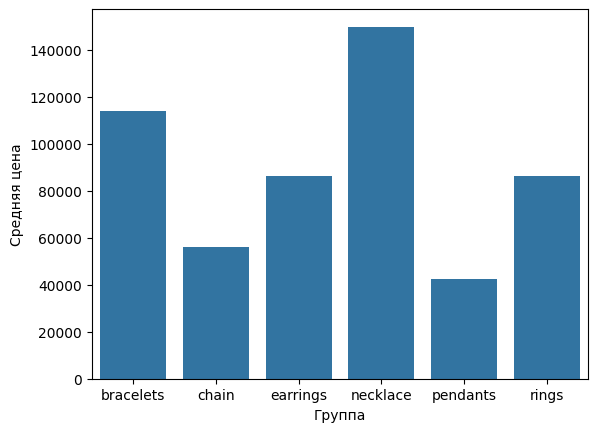

In [17]:
sns.barplot(df_group_avg,x ='Группа',y = 'Средняя цена')

Для дальнейшей проверки корреляции и линейной регресии переведем столбец "Металл" в числовой тип

In [18]:
def change_column(x):
  if x == 'Золото 750':
    return 0
  elif x == 'Золото 585':
    return 1
  elif x == 'Золото 375':
    return 2
  else:
    return 3
df['Металл'] = df['Металл'].apply(change_column)
df['Металл'].unique()


array([1, 3, 2, 0])

In [19]:
df['Металл'].value_counts()

Металл
1    11650
3      737
0      539
2       58
Name: count, dtype: int64

<Axes: >

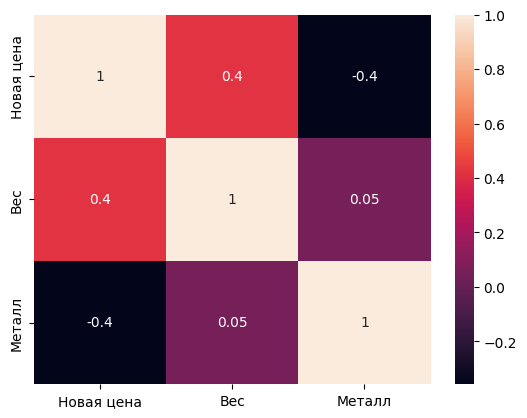

In [20]:
df_heatmap = df[['Новая цена','Вес','Металл']]
sns.heatmap(df_heatmap.corr(),annot = True,fmt='.1g')

Наблюдаем умеренную положительную корреляцию между весом и ценой, а также умеренную отрицательную корреляцию между видом металла и ценой

Видвинем гипотезу, что все кольца дороже сережек.
H0: Разница в цене статистически не значима
H1: Разница статистически значима

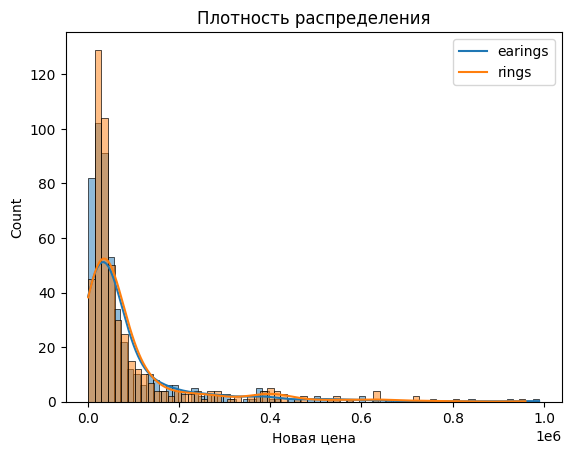

In [21]:
df_earring= df[df['Группа'] == 'earrings'].sample(n=500)
df_ring= df[df['Группа'] == 'rings'].sample(n=500)
sns.histplot(df_earring['Новая цена'], kde=True)
sns.histplot(df_ring['Новая цена'], kde=True)
plt.title('Плотность распределения')
plt.legend(['earings', 'rings'])

In [22]:
alpha = 0.05
result = ttest_ind(df_earring['Новая цена'], df_ring['Новая цена'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.61496362
Не отвергаем нулевую гипотезу
